In [1]:
# Author: William Scott

# Import necessary libraries
import cobra
import numpy as np

model.solver = 'glpk'
type(model.solver)

# Load the metabolic model from SBML file
model = cobra.io.read_sbml_model('/Users/williamscott/Library/CloudStorage/OneDrive-WageningenUniversity&Research/UNLOCK/Projects/Tick_Mitocholria_Project/Genome-Scale_Models/Ir9_Rh.xml')

# Define the objective function for FBA
model.objective = "Growth"  # Replace 'biomass_reaction' with the actual biomass reaction in your model

# Set bounds for exchange reactions
for reaction in model.exchanges:
    reaction.lower_bound = -1000  # Allow uptake of all metabolites

# Solve FBA to maximize biomass production
solution = model.optimize()

# Print the maximum biomass production rate
print("Maximum biomass production rate:", solution.objective_value)

# Define the threshold for minimal growth rate
threshold = 0.0001 * solution.objective_value  # Adjust the threshold as per your requirements

# Identify minimal media components
minimal_media = []
for exchange_reaction in model.exchanges:
    exchange_reaction.lower_bound = -10  # Set a low uptake rate
    model.objective = exchange_reaction.id  # Optimize for each exchange reaction
    exchange_solution = model.optimize()
    if exchange_solution.objective_value >= threshold:
        minimal_media.append(exchange_reaction.id)
    exchange_reaction.lower_bound = 0  # Reset the uptake rate to zero

# Print the minimal media components
print("Minimal media components:")
for component in minimal_media:
    print(component)

Maximum biomass production rate: 31.194564577962065
Minimal media components:
EX_2mba_e
EX_2obut_e
EX_5drib_e
EX_LalaDgluMdap_e
EX_acac_e
EX_acald_e
EX_actn__R_e
EX_co2_e
EX_d23hb_e
EX_enter_e
EX_etha_e
EX_fald_e
EX_fe2_e
EX_fe3_e
EX_g3pg_e
EX_h2o_e
EX_h2s_e
EX_h_e
EX_mal__L_e
EX_nh4_e
EX_no2_e


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-04


/opt/anaconda3/lib/python3.9/site-packages/cobra/medium/minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


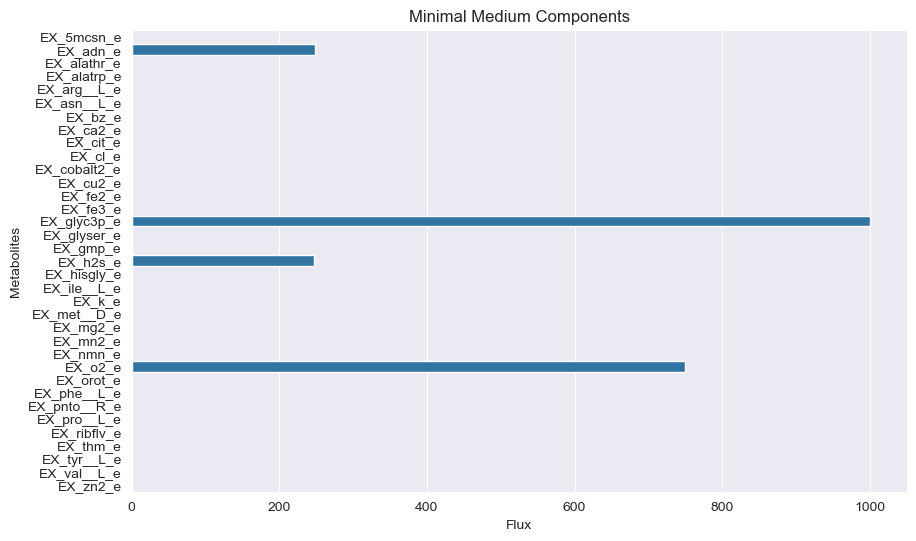

In [1]:
# Cell 1: Setup
import cobra
import matplotlib.pyplot as plt
import seaborn as sns


# Load your model (Replace 'your_model.xml' with your actual model file)
model = cobra.io.read_sbml_model('/Users/williamscott/DataspellProjects/Tick_Mito_Project/Ir9_Mm.xml')

# Cell 2: Determine Minimal Medium
minimal_medium = cobra.medium.minimal_medium(model, minimize_components=True)

# Cell 3: Data Preparation
# Convert minimal_medium to a DataFrame for easier visualization
import pandas as pd
medium_df = pd.DataFrame(minimal_medium, columns=['Flux'])
medium_df['Metabolites'] = medium_df.index

# Cell 4: Visualization
# Create a bar plot of the minimal medium components
plt.figure(figsize=(10, 6))
sns.barplot(x='Flux', y='Metabolites', data=medium_df)
plt.title('Minimal Medium Components')
plt.xlabel('Flux')
plt.ylabel('Metabolites')
plt.show()

# Cell 5: Interpretation and Analysis
# Add markdown cells or Python comments to discuss the findings from the minimal medium analysis.

In [16]:
import cobra
from cobra.io.sbml import validate_sbml_model
import os

# Path to your model file
model_path = '/Users/williamscott/DataspellProjects/Tick_Mito_Project/Ir9_Mm.xml'

# Validate the model
(model, errors) = validate_sbml_model(model_path)

# Check if there are any errors
if errors:
    print("Errors were found in the SBML model:")
    for e in errors:
        print(e)
else:
    print("No errors found in the SBML model.")

if not errors:
    model = cobra.io.read_sbml_model(model_path)
    print("Model loaded successfully.")
else:
    print("Model not loaded due to errors.")


Errors were found in the SBML model:
SBML_FATAL
SBML_ERROR
SBML_SCHEMA_ERROR
SBML_WARNING
COBRA_FATAL
COBRA_ERROR
COBRA_WARNING
COBRA_CHECK
Model not loaded due to errors.
